In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
train=pd.read_csv('/Users/vishnuvardhanvankayalapati/Desktop/Kaggle Competitions/titanic/Data/train.csv')

In [38]:
len(train)

891

In [3]:
test=pd.read_csv('/Users/vishnuvardhanvankayalapati/Desktop/Kaggle Competitions/titanic/Data/test.csv')

In [37]:
len(test)

418

In [4]:
#Cheching missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#Checking data types of each column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train['Age'].fillna(train['Age'].mean(), inplace = True)
test['Age'].fillna(test['Age'].mean(), inplace = True)

In [8]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

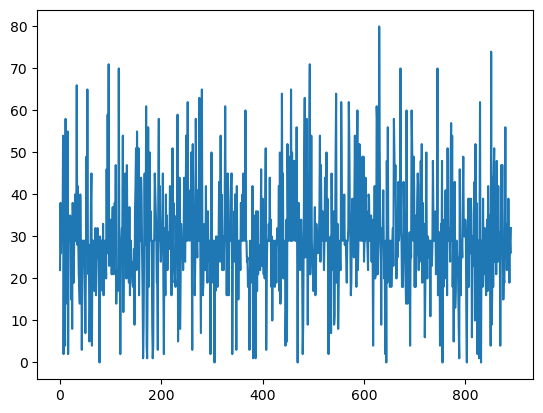

In [9]:
#plotting the Age frequency of the passengers
plt.plot(train['Age'])

<AxesSubplot:ylabel='Frequency'>

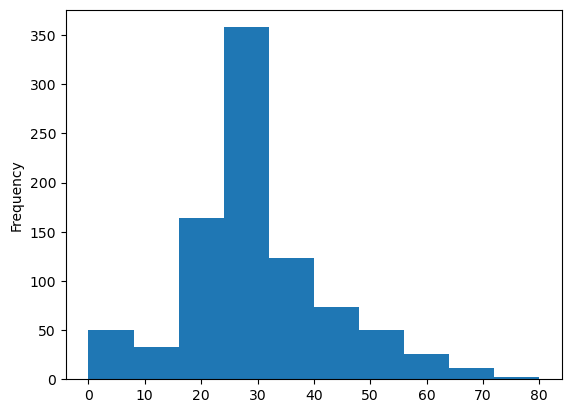

In [10]:
#Plotting the Age frequency of passenger according to their respective ages
train['Age'].plot(kind='hist')

In [11]:
#Number of categories in a feature
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

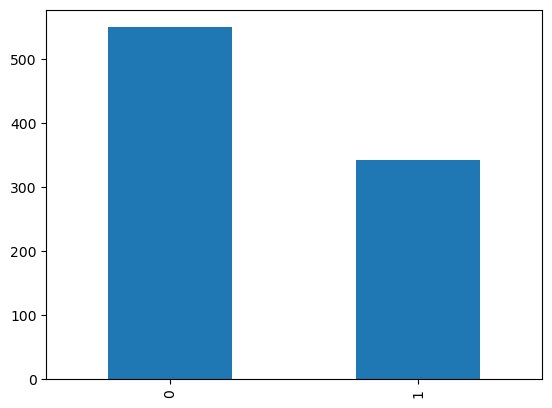

In [12]:
#plotting the number of categories in a feature
train['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

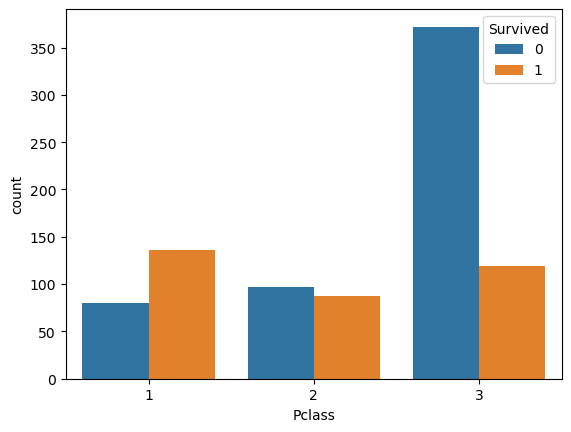

In [13]:
# count plot on two categorical variable
sns.countplot(x ='Pclass', hue = "Survived", data = train)

***From the above plot, We can say that the Lower ticket class were likely to survive the most then the middle and upper ticket class***

In [14]:
#Percentage of passengers survived by gender
men = train.loc[train.Sex == 'male']['Survived'] 
men_survived = sum(men)/len(men)
women = train.loc[train.Sex == 'female']['Survived'] 
women_survived = sum(women)/len(women)

print('% of men who survived: ', men_survived)
print('% of women who survived: ', women_survived)

% of men who survived:  0.18890814558058924
% of women who survived:  0.7420382165605095


***Lessthan 19% of male on-board survived this disaster While Nearly 75% of women on-board survived this disaster***

In [15]:
#Checking Multicollinearity
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033741,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500
Age,0.033741,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000


In [16]:
X=train[['Pclass','Age','SibSp','Parch']]
y=train['Survived']

In [17]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
len(X_train)

712

In [42]:
len(y_test)

179

In [40]:
len(y_train)

712

**Support Vector Machince**

In [18]:
Clf=svm.SVC(kernel='linear')
Clf.fit(X_train,y_train)

SVC(kernel='linear')

In [19]:
y_pred=Clf.predict(X_test)

In [20]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6759776536312849

**Decision Tree**

In [21]:
Clf1=DecisionTreeClassifier()
Clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred1=Clf1.predict(X_test)

In [23]:
accuracy1=accuracy_score(y_test,y_pred1)
accuracy1

0.6480446927374302

**Random Forest**

In [24]:
Clf2=RandomForestClassifier()
Clf2.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred2=Clf2.predict(X_test)

In [26]:
accuracy2=accuracy_score(y_test,y_pred2)
accuracy2

0.6759776536312849

**Logistic Regression**

In [27]:
Clf3=LogisticRegression()
Clf3.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred3=Clf3.predict(X_test)

In [29]:
accuracy3=accuracy_score(y_test,y_pred3)
accuracy3

0.7430167597765364

In [51]:
X_pred3 = pd.get_dummies(test[['Pclass','Age','SibSp','Parch']])
prediction = Clf3.predict(X_pred3)
prediction
len(prediction)

418

In [54]:
# Displaying the results as a new dataframe with two columns
Submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': prediction})

#Exporting dataframe into csv file
Submission.to_csv('/Users/vishnuvardhanvankayalapati/Desktop/Kaggle Competitions/titanic/Data/submission.csv', index=False)